<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предварительная-оценка-(изучение)-данных" data-toc-modified-id="Предварительная-оценка-(изучение)-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предварительная оценка (изучение) данных</a></span></li><li><span><a href="#Подготовка-данных-для-машинного-обучения" data-toc-modified-id="Подготовка-данных-для-машинного-обучения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных для машинного обучения</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<b>Цель проекта:</b> спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

<b>Признаки</b>

   - RowNumber — индекс строки в данных
   - CustomerId — уникальный идентификатор клиента
   - Surname — фамилия
   - CreditScore — кредитный рейтинг
   - Geography — страна проживания
   - Gender — пол
   - Age — возраст
   -  Tenure — сколько лет человек является клиентом банка
   - Balance — баланс на счёте
   - NumOfProducts — количество продуктов банка, используемых клиентом
   - HasCrCard — наличие кредитной карты
   - IsActiveMember — активность клиента
   - EstimatedSalary — предполагаемая зарплата

<b>Целевой признак</b>

    Exited — факт ухода клиента

## Подготовка данных

### Предварительная оценка (изучение) данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

#модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#метики
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#функции
from sklearn.utils import shuffle

#визуализация
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    data=pd.read_csv('desktop/datasets/Churn.csv')
except:
    data=pd.read_csv('/datasets/Churn.csv')

data.head()  

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
#общая информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#оценка процента пропусков
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('rainbow') 

,0
RowNumber,0.000000
CustomerId,0.000000
Surname,0.000000
CreditScore,0.000000
Geography,0.000000
Gender,0.000000
Age,0.000000
Tenure,9.090000
Balance,0.000000
NumOfProducts,0.000000


In [6]:
#проверка наличия дубликатов
data.duplicated().sum()

0

In [7]:
#просмотр категориальных столбцов
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
#просмотр категориальных столбцов
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
#просмотр как распределены данные по столбцу с пропусками 
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

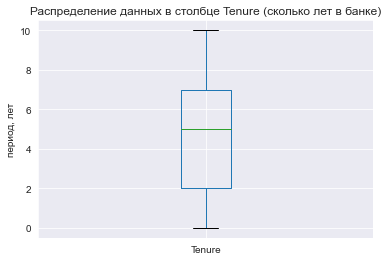

In [10]:
#посмотрим распределение на boxplot
sns.set_style('darkgrid')
plt.title('Распределение данных в столбце Tenure (сколько лет в банке)')
data.boxplot(column='Tenure')
plt.ylabel('период, лет')
plt.show()

<b>Промежуточные выводы по изучению данных:</b> 

- Данные проанализированы на предмет наличия дубликатов, пропусков и ошибок.
- Дубликатов не обнаружено, но обнаружены пропуски в столбце Tenure, просмотрено распределение данных в нем и так как пропусков не более 10% принято решение произвести замену на медиану.
- Обнаружены категориальные данные, принято решение произвести их кодирование;
- Так же необходимо произвести масштабирование данных.


### Подготовка данных для машинного обучения

In [11]:
#обработка пропусков (замена на медианное значение)
data['Tenure']=data['Tenure'].fillna(data['Tenure'].median())

In [12]:
#проверка обработки пропусков
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
#проверка обработки пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [14]:
#оставим в датасете те столбцы, которые представляют ценность для машинного обучения

data_ml=data.drop(['RowNumber','CustomerId', 'Surname'],axis=1)
data_ml.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [15]:
#применение метода OHE к столбцам + просмотр того, что получилось
data_ml = pd.get_dummies(data_ml, drop_first=True)
data_ml.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


### Разделение на выборки (тренировочная, тестовая, валидационная)

In [16]:
#разделим выборки по принципу 3:1:1
#(60% train, 20% test, 20% valid)
data_train, data_valid = train_test_split(data_ml, test_size=0.4, random_state=12345)
data_valid,data_test = train_test_split(data_valid, test_size=0.5, random_state=12345)

In [17]:
#посмотрим что получилось
print('Размер обучающей выборки:', data_train.shape[0],'объектов')
print('Размер валидационной выборки:', data_valid.shape[0],'объектов')
print('Размер тестовой выборки:',data_test.shape[0],'объектов')

Размер обучающей выборки: 6000 объектов
Размер валидационной выборки: 2000 объектов
Размер тестовой выборки: 2000 объектов


In [18]:
#выделяем признаки и целевую переменную

# тренировочная выборка
features_train = data_train.drop('Exited', axis=1)
target_train = data_train['Exited']
# валидационная выборка
features_valid = data_valid.drop('Exited', axis=1)
target_valid = data_valid['Exited']
# тестовая выборка
features_test = data_test.drop('Exited', axis=1)
target_test = data_test['Exited']

Проведем масштабирование числовых признаков по тестовой/валидационной/тренировочной выборкам

In [19]:
#выделим числовые признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

#масштабируем признаки в тренировочной/валидационной/тестовой выборках

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [20]:
#посмотрим что получилось на обучающей
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


In [21]:
#посмотрим что получилось на тестовой
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.446272,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.810266,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.810266,0.615625,-0.891560,0,1,-1.070919,0,0,1


In [22]:
#посмотрим что получилось на валидационной
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.829679,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.810266,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.810266,-1.233163,0.830152,1,0,1.358533,0,1,1


<b>Вывод по подготовке данных:</b> 

- выполнено удаление лишних столбцов;
- выполнена замена пропусков на медианное значение;
- выполнено кодирование категориальных признаков методом OHE
- выполнено разделение на тренировочкую, валидационную и тестовую выборки;
- выполнено масштабирование признаков.

## Исследование задачи

#### 2.1 Обучение трех моделей на исходных, несбалансированных данных: 

In [23]:
#создадим функцию, вычисляющую метрики
def metric_for_models(target, predictions,type_model):
    print('Показатели модели',type_model)
    print()
    print('Полнота, recall' , recall_score(target, predictions))
    print('Точность, precision', precision_score(target, predictions))
    print('Мера f1', f1_score(target, predictions))
    print('auc-roc', roc_auc_score(target, predictions))

#создадим функцию, возвращающую матрицу ошибок
def matrix_conf(target,predictions,type_model):
    print()
    print('Матрица ошибок')
    print()
    print(confusion_matrix(target, predictions,normalize='true'))    

#создадим константную модель
target_predict_constant = pd.Series([0]*len(target_valid)) 

In [24]:
#создадим функцию, строящую ROC-кривую 
def roc_curve_drawing(target, probabilities_one,ptitle):
    sns.set_style('darkgrid')
    
    fpr, tpr, thresholds = roc_curve(target, probabilities_one) 

    plt.figure()
    plt.plot(fpr, tpr,color='g',alpha=0.8)
    plt.plot([0, 1], [0, 1], linestyle='--',color='orange',alpha=0.8)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC-кривая для {}'.format(ptitle))
    
    plt.show()

In [25]:
#функция обучения + подбора параметров Дерево решений
def dec_tree_func(features,target):
    
    best_f1_dtc=0
    best_depth_dtc=0

    for depth in range(1,51):
        model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
        model.fit(features, target)
        predictions = model.predict(features_valid)
        f1_dtc = f1_score(target_valid, predictions)
        
        #поиск лучшей модели из множества вариантов
        if f1_dtc > best_f1_dtc: 
            best_f1_dtc=f1_dtc
            best_depth_dtc=depth
            
    print('Лучшая модель:',best_f1_dtc, 'глубина:', best_depth_dtc )

In [26]:
#функция обучения + подбора параметров Случайный лес
def rand_for_func(features,target):
   
    best_f1_rfc=0
    best_estimators_rfc=0
    best_depth_rfc=0

    #создадим двойной цикл по числу деревьев и глубине дерева

    for est in range(1,101,10):
        for depth in range(1,11):
            model = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth=depth)
            model.fit(features,target)
            predictions = model.predict(features_valid)
            f1_rfc = f1_score(target_valid, predictions)
        
        #поиск лучшей модели из множества вариантов
            if f1_rfc > best_f1_rfc:
                best_estimators_rfc=est 
                best_f1_rfc=f1_rfc
                best_depth_rfc=depth
            
    print('Лучшая модель:',best_f1_rfc, 'estimators:', best_estimators_rfc, 'глубина:', best_depth_rfc)

In [27]:
#обучение дерева решений + поиск параметров
dec_tree_func(features_train,target_train)

Лучшая модель: 0.5696969696969697 глубина: 6


In [28]:
rand_for_func(features_train,target_train)

Лучшая модель: 0.5924812030075188 estimators: 11 глубина: 10


In [29]:
#обучение дерева с лучшими параметрами
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_dtc.fit(features_train,target_train)
dtc_predictions = model_dtc.predict(features_valid)

In [30]:
#обучение случайного леса с лучшими параметрами
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=11, max_depth=10)
model_rfc.fit(features_train,target_train)
rfc_predictions = model_rfc.predict(features_valid)


In [31]:
#логистическая регрессия
log_model = LogisticRegression(random_state=12345)
log_model.fit(features_train,target_train)
log_predictions = log_model.predict(features_valid)


In [32]:
#сравним accuracy для трех моделей
print('"Дерево решений" ', accuracy_score(dtc_predictions,target_valid))
print('"Случайный лес"', accuracy_score(rfc_predictions,target_valid)) 
print('"Логистическая регрессия"', accuracy_score(log_predictions,target_valid))

"Дерево решений"  0.858
"Случайный лес" 0.8645
"Логистическая регрессия" 0.802


In [33]:
#метрики и матрицу ошибок для трех моделей
metric_for_models(target_valid, dtc_predictions,'"Дерево решений" ')
matrix_conf(target_valid, dtc_predictions,'"Дерево решений" ')
print()
print('-----------')
print()
metric_for_models(target_valid, rfc_predictions,'"Случайный лес" ')
print()
matrix_conf(target_valid, rfc_predictions,'"Случайный лес" ')
print('-----------')
print()
metric_for_models(target_valid, log_predictions,'"Логистическая регрессия"')
matrix_conf(target_valid, log_predictions,'"Логистическая регрессия"')

Показатели модели "Дерево решений" 

Полнота, recall 0.44976076555023925
Точность, precision 0.7768595041322314
Мера f1 0.5696969696969697
auc-roc 0.7078133789824521

Матрица ошибок

[[0.96586599 0.03413401]
 [0.55023923 0.44976077]]

-----------

Показатели модели "Случайный лес" 

Полнота, recall 0.47129186602870815
Точность, precision 0.7975708502024291
Мера f1 0.5924812030075188
auc-roc 0.7198431517248471


Матрица ошибок

[[0.96839444 0.03160556]
 [0.52870813 0.47129187]]
-----------

Показатели модели "Логистическая регрессия"

Полнота, recall 0.23444976076555024
Точность, precision 0.5632183908045977
Мера f1 0.33108108108108103
auc-roc 0.5932046528227246

Матрица ошибок

[[0.95195954 0.04804046]
 [0.76555024 0.23444976]]


In [34]:
#подготовим вероятности для построения roc-функции
dtc_probabilities = model_dtc.predict_proba(features_valid)[:, 1]
rfc_probabilities = model_rfc.predict_proba(features_valid)[:, 1]
log_probabilities = log_model.predict_proba(features_valid)[:, 1]


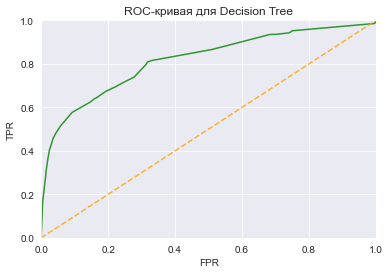

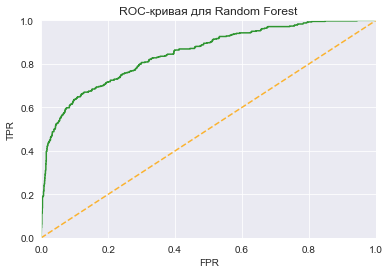

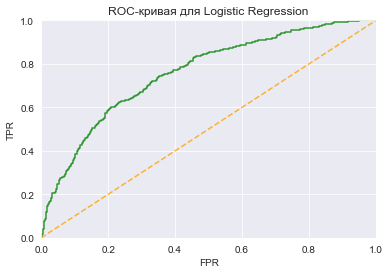

In [35]:
#построим функции для соответсвующих моделей
roc_curve_drawing(target_valid, dtc_probabilities,'Decision Tree')
roc_curve_drawing(target_valid, rfc_probabilities,'Random Forest')
roc_curve_drawing(target_valid, log_probabilities,'Logistic Regression' )

<b>Вывод:</b> 
- в целом все метрики низкие;
- лучшая accuracy y Random Forest <b>(≈0.86)</b>
- лучшая метрика f1 у Random Forest <b>(≈0.57)</b>;
- лучшая метрика precision у Random Forest <b>(≈0.77)</b>;
- лучшая метрика recall у Decision Tree <b>(≈0.49)</b>;
- лучшая площадь под графиком ошибок auc-roc у Random Forest <b>(≈0.71)</b>
Известно, что чем выше roc-кривая, тем качественнее модель, по графику видно, что наиболее высоко лежит график Random Forest, однако значение его auc-roc все-таки низкое. 

#### 2.2. Проверка моделей на адекватность

In [36]:
#проанализируем на константной модели
target_predict_constant = pd.Series([0]*len(target_valid))
accuracy_score_constant = accuracy_score(target_valid, target_predict_constant)
accuracy_score_constant

0.791

<b>Вывод по исследованию задачи:</b> 
- на несбалансированной выборке обучены три модели: Decision Tree, Random Forest и Logistic Regression;
- проанализированы основные метрики моделей, хуже всего себя показала Logistic Regression, лучше всего Random Forest, однако ее показатель auc-roc все еще далек от 1;
- значение accuracy константной модели близко ко всем трем моделям, соответственно рнеобходима доработка моделей по направлению ликвидации дисбаланса.

## Борьба с дисбалансом

Изучим дисбаланс классов: в целевой переменной исходной выборки и как предсказывала модель

In [37]:
#оцениваем исходный дисбаланс классов 
target_train.value_counts(normalize = True)

0    0.800667
1    0.199333
Name: Exited, dtype: float64

0    0.879
1    0.121
dtype: float64


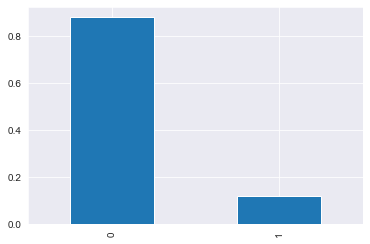

In [38]:
#как часто модель предсказывала класс «1» или «0» по Дереву решений:
class_frequency_dtc = pd.Series(dtc_predictions).value_counts(normalize=True)
print(class_frequency_dtc)

#на диаграмме
class_frequency_dtc.plot(kind='bar');

0    0.8765
1    0.1235
dtype: float64


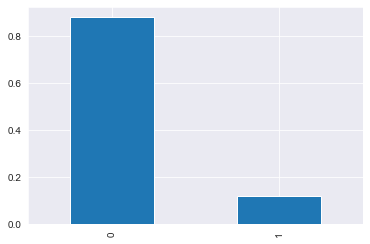

In [39]:
#как часто модель предсказывала класс «1» или «0» по Случайному лесу:
class_frequency_rfc = pd.Series(rfc_predictions).value_counts(normalize=True)
print(class_frequency_rfc)

#на диаграмме
class_frequency_dtc.plot(kind='bar');

0    0.913
1    0.087
dtype: float64


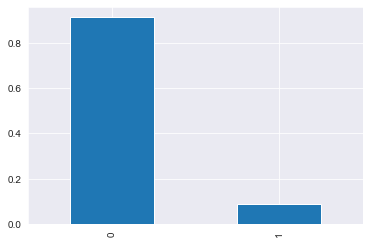

In [40]:
#как часто модель предсказывала класс «1» или «0» по Случайному лесу:
class_frequency_log = pd.Series(log_predictions).value_counts(normalize=True)
print(class_frequency_log)

#на диаграмме
class_frequency_log.plot(kind='bar');

<b>Вывод:</b>

- В исходной целевой переменной наблюдается дисбаланс классов

- Все модели в основном склонялись к предсказанию 0

- Логистическая регрессия в 90% предсказывает 0

     Проблему дисбаланса будем решать следующими способами:
     

- Добавлением в модель параметра class_weight
- Увеличением выборки 

#### 3.1 Добавление в модель параметра class_weight

In [58]:
best_f1_cw=0
best_depth_cw=0

for depth in range(1,51):
    model_dtc_w = DecisionTreeClassifier(random_state=12345,class_weight='balanced', max_depth=depth)
    model_dtc_w.fit(features_train,target_train)
    dtc_predictions_w = model_dtc_w.predict(features_valid)
    f1_cw = f1_score(target_valid, dtc_predictions_w)
        
        #поиск лучшей модели из множества вариантов
    if f1_cw > best_f1_cw: 
        best_f1_cw=f1_cw
        best_depth_cw=depth
            
print('Лучшая модель:',best_f1_cw, 'глубина:', best_depth_cw )

Лучшая модель: 0.5963791267305644 глубина: 5


In [62]:
#функция обучения + подбора параметров Случайный лес
best_f1_rfc_cw=0
best_estimators_rfc_cw=0
best_depth_rfc_cw=0

    #создадим двойной цикл по числу деревьев и глубине дерева

for est in range(1,101,10):
    for depth in range(1,11):
        model_rfc_w = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth=depth,class_weight='balanced')
        model_rfc_w.fit(features_train,target_train)
        rfc_predictions_w = model_rfc_w.predict(features_valid)
        f1_rfc_cw = f1_score(target_valid, rfc_predictions_w)
        
        #поиск лучшей модели из множества вариантов
        if f1_rfc_cw > best_f1_rfc_cw:
            best_estimators_rfc_cw=est 
            best_f1_rfc_cw=f1_rfc_cw
            best_depth_rfc_cw=depth
            
print('Лучшая модель:',best_f1_rfc_cw, 'estimators:', best_estimators_rfc_cw, 'глубина:', best_depth_rfc_cw)
   
   

Лучшая модель: 0.6285714285714286 estimators: 71 глубина: 9


In [63]:
#обучение дерева решений с параметром class_weight 
model_dtc_w = DecisionTreeClassifier(random_state=12345,class_weight='balanced',max_depth=5)
model_dtc_w.fit(features_train,target_train)
dtc_predictions_w = model_dtc_w.predict(features_valid)

#обучение случайного леса с параметром class_weight
model_rfc_w = RandomForestClassifier(random_state=12345, n_estimators=71,max_depth=9,class_weight='balanced')
model_rfc_w.fit(features_train,target_train)
rfc_predictions_w = model_rfc_w.predict(features_valid)

#логистическая регрессия с параметром class_weight
log_model_w = LogisticRegression(random_state=12345,solver='liblinear', class_weight='balanced')
log_model_w.fit(features_train,target_train)
log_predictions_w = log_model_w.predict(features_valid)

In [64]:
#f1 и accuracy моделей до и после применения class_weight

print('"Дерево решений" accuracy ','ДО -->', accuracy_score(target_valid,dtc_predictions),'ПОСЛЕ --->',accuracy_score(target_valid,dtc_predictions_w))
print()

print('"Случайный лес" accuracy', 'ДО -->', accuracy_score(target_valid,rfc_predictions),'ПОСЛЕ --->',accuracy_score(target_valid,rfc_predictions_w)) 
print()

print('"Логистическая регрессия" accuracy', 'ДО -->', accuracy_score(target_valid,log_predictions),'ПОСЛЕ --->',accuracy_score(target_valid,log_predictions_w)) 


"Дерево решений" accuracy  ДО --> 0.858 ПОСЛЕ ---> 0.8105

"Случайный лес" accuracy ДО --> 0.8645 ПОСЛЕ ---> 0.8375

"Логистическая регрессия" accuracy ДО --> 0.802 ПОСЛЕ ---> 0.702


In [65]:
#основные метрики
metric_for_models(target_valid, dtc_predictions_w,'"Дерево решений" ')
matrix_conf(target_valid, dtc_predictions_w,'"Дерево решений" ')
print()
print('-----------')
print()
metric_for_models(target_valid, rfc_predictions_w,'"Случайный лес" ')
print()
matrix_conf(target_valid, rfc_predictions_w,'"Случайный лес" ')
print('-----------')
print()
metric_for_models(target_valid, log_predictions_w,'"Логистическая регрессия"')
matrix_conf(target_valid, log_predictions_w,'"Логистическая регрессия"')

Показатели модели "Дерево решений" 

Полнота, recall 0.6698564593301436
Точность, precision 0.5374280230326296
Мера f1 0.5963791267305644
auc-roc 0.7587588238496482

Матрица ошибок

[[0.84766119 0.15233881]
 [0.33014354 0.66985646]]

-----------

Показатели модели "Случайный лес" 

Полнота, recall 0.6578947368421053
Точность, precision 0.6017505470459519
Мера f1 0.6285714285714286
auc-roc 0.7714252445272474


Матрица ошибок

[[0.88495575 0.11504425]
 [0.34210526 0.65789474]]
-----------

Показатели модели "Логистическая регрессия"

Полнота, recall 0.6818181818181818
Точность, precision 0.3810160427807487
Мера f1 0.4888507718696398
auc-roc 0.6945753361682564

Матрица ошибок

[[0.70733249 0.29266751]
 [0.31818182 0.68181818]]


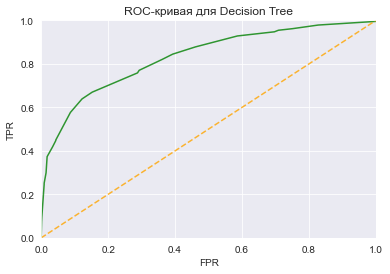

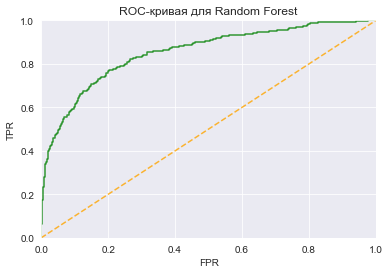

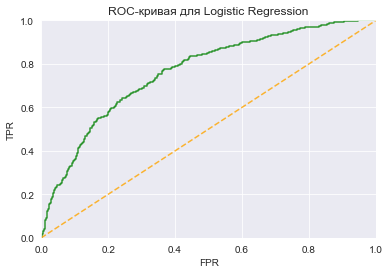

In [66]:
#roc-кривая

dtc_probabilities_w = model_dtc_w.predict_proba(features_valid)[:, 1]
rfc_probabilities_w = model_rfc_w.predict_proba(features_valid)[:, 1]
log_probabilities_w = log_model_w.predict_proba(features_valid)[:, 1]

roc_curve_drawing(target_valid, dtc_probabilities_w,'Decision Tree')
roc_curve_drawing(target_valid, rfc_probabilities_w,'Random Forest')
roc_curve_drawing(target_valid, log_probabilities_w,'Logistic Regression' )

<b>Вывод:</b> Метрики после применения метода изменились, лидер Random Forest. Удалось добиться преодоления целевым показателем f1 заданной границы, однако дисбаланс сохранился.

#### 3.2. Увеличение выборки (Upsampling)

In [46]:
#создадим функцию upsample
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)


In [47]:
#проверим размер выборки и баланс
print(features_upsampled.shape)
print(target_upsampled.shape)
print(target_upsampled.value_counts(normalize = True))

(9588, 11)
(9588,)
0    0.501043
1    0.498957
Name: Exited, dtype: float64


Удалось добиться баланса в выборке, обучим модель на этих данных и найдем ее лучшие параметры!

<b>Дерево решений</b>

In [48]:
#обучение дерева решений + поиск параметров
dec_tree_func(features_upsampled, target_upsampled)

Лучшая модель: 0.5963791267305644 глубина: 5


In [49]:
best_dtc_up = DecisionTreeClassifier(random_state=12345,max_depth=5)
best_dtc_up.fit(features_upsampled, target_upsampled)
dtc_predictions_best_up = best_dtc_up.predict(features_valid)

<b>Случайный лес</b>

In [50]:
rand_for_func(features_upsampled, target_upsampled)

Лучшая модель: 0.6291179596174282 estimators: 71 глубина: 9


In [51]:
#модель Случайный лес с лучшими параметрами 
best_rfc_up = RandomForestClassifier(random_state=12345, n_estimators=71,max_depth=9)
best_rfc_up.fit(features_upsampled, target_upsampled)
rfc_predictions_best_up = best_rfc_up.predict(features_valid)

<b>Логистическая регрессия</b>

In [52]:
#обучение Логистической регрессия при увеличенной выборке 
log_model_up = LogisticRegression(random_state=12345,solver='liblinear')
log_model_up.fit(features_upsampled, target_upsampled)
log_predictions_up = log_model_up.predict(features_valid)

In [53]:
#посмотрим метрику accuracy до и после применения метода
print('"Дерево решений"')
print('Исходное значение',accuracy_score(target_valid,dtc_predictions))
print('Увеличенная выборка',accuracy_score(target_valid,dtc_predictions_best_up))
print()

print('"Случайный лес"')
print('Исходное значение',accuracy_score(target_valid,rfc_predictions))
print('Увеличенная выборка',accuracy_score(target_valid,rfc_predictions_best_up))

print()
print('"Логистическая регрессия"')
print('Исходное значение',accuracy_score(target_valid,log_predictions))
print('Увеличенная выборка',accuracy_score(target_valid,log_predictions_up))

"Дерево решений"
Исходное значение 0.858
Увеличенная выборка 0.8105

"Случайный лес"
Исходное значение 0.8645
Увеличенная выборка 0.8255

"Логистическая регрессия"
Исходное значение 0.802
Увеличенная выборка 0.702


In [54]:
#посмотрим на остальные метрики

metric_for_models(target_valid, dtc_predictions_best_up,'"Дерево решений" ')
print()
print('-----------')
print()
metric_for_models(target_valid, rfc_predictions_best_up,'"Случайный лес" ')
print()
print('-----------')
print()
metric_for_models(target_valid, log_predictions_up,'"Логистическая регрессия"')

Показатели модели "Дерево решений" 

Полнота, recall 0.6698564593301436
Точность, precision 0.5374280230326296
Мера f1 0.5963791267305644
auc-roc 0.7587588238496482

-----------

Показатели модели "Случайный лес" 

Полнота, recall 0.7081339712918661
Точность, precision 0.5659655831739961
Мера f1 0.6291179596174282
auc-roc 0.7823223585915715

-----------

Показатели модели "Логистическая регрессия"

Полнота, recall 0.6818181818181818
Точность, precision 0.3810160427807487
Мера f1 0.4888507718696398
auc-roc 0.6945753361682564


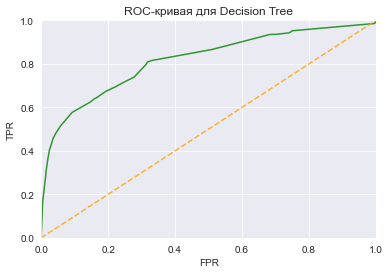

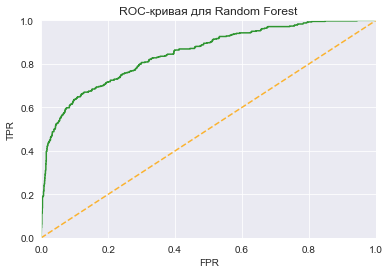

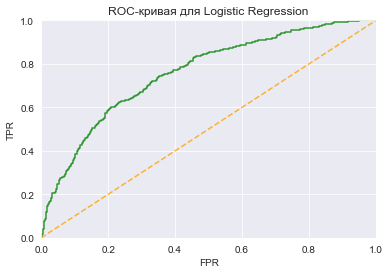

In [55]:
#построим roc-кривые для моделей
dtc_probabilities_up = best_dtc_up.predict_proba(features_valid)[:, 1]
rfc_probabilities_up = best_rfc_up.predict_proba(features_valid)[:, 1]
log_probabilities_up = log_model_up.predict_proba(features_valid)[:, 1]

roc_curve_drawing(target_valid, dtc_probabilities,'Decision Tree')
roc_curve_drawing(target_valid, rfc_probabilities,'Random Forest')
roc_curve_drawing(target_valid, log_probabilities,'Logistic Regression' )

<b>Вывод:</b> 
- удалось ликвидировать дисбаланс данных, за счет увеличения значений позитивного класса в 4 раза;
- в целом почти все метрики моделей подросли по сравнению с несбалансированной;
- после применения метода удалось добиться достижения целевого показателя по метрике на модели Random Forest: f1 ≈ 0.61
- значение auc-roc у Random Forest выросло, незначительно снизилась accuracy;
Попробуем еще немного улучшить модель Random Forest

## Тестирование модели

In [56]:
#тестирование модели
predictions_test = best_rfc_up.predict(features_test)

print('Значение accuracy на тестовой выборке равно {}'.format(accuracy_score(target_test, predictions_test)))

Значение accuracy на тестовой выборке равно 0.8105


In [57]:
#основные метрики на тестовой
metric_for_models(target_test, predictions_test,'"Random Forest, тестовая выборка"')

Показатели модели "Random Forest, тестовая выборка"

Полнота, recall 0.6903073286052009
Точность, precision 0.5407407407407407
Мера f1 0.6064382139148494
auc-roc 0.7665233535860502


<b>ВЫВОД:</b>

1. Были изучены исходные данные и проведена их подготовка для машинного обучения:
- оценены и устранены пропуски в столбце Tenure (пропусков <10%, проведена замена на медианное значение);
- удалены столбцы, не представляющие интереса для машинного обучения;
- проведено кодирование по методу OHE категориальных данных;
- проведено масштабирование числовых данных;
- проведено разделение выборки на тренировочную/валидационную/тестовую по принципу 3:1:1(60%-20%-20%).
2. Обучены три основные модели: Decision Tree, Random Forest и Logistic Regression на несбалансированных данных:
- расчитаны основные метрики по моделям, установлено, что все три модели показали низкое значение по метрике f1 и auc-roc;
- посроена roc-кривая для каждой из моделей на несбалансированной выборке;
Выяснено, что наилучший результат на несбалансированных данных получен на модели Random Forest:
- Полнота, recall 0.46172248803827753
- Точность, precision 0.7689243027888446
- Мера f1 0.5769805680119582
- auc-roc 0.7125300177233107
по confusion_matrix видно, что модель тяготеет к предсказанию нулевого класса.

3. Проанализирован дисбалан данных и выбраны два метода его ликвидации:

- Добавлением в модель параметра class_weight
- Увеличением выборки upsampling
    
4. Добавление в модель параметра class_weight не принесли существенных изменений в метрики.

5. При реализации метода upsampling удалось добиться выравнивания классов 
- "0"    0.501043
- "1"    0.498957
На сбалансированных данных метрики всех моделей улучшились, лучше всего себя показала Random Forest, на ней удалось получить:
- Accuracy 0.85
- Полнота 0.5502392344497608
- Точность 0.6804733727810651
- Мера f1 0.6084656084656085
- auc-roc 0.7409856096395454

Метрика f1 (0.61) > заданной целевой 0.59

6. Произведено дальнейшее улучшение модели Random Forest при помощи GridSearchCV и получено увеличение метрик f1 и auc_roc:

- Полнота, recall 0.6794258373205742
- Точность, precision 0.5748987854251012
- <b>Мера f1 0.6228070175438596</b>
- <b>auc-roc 0.773341237244358</b>

7. Произведена проверка на тестовой выборке и получены следующие метрики:
- Полнота, recall 0.6690307328605201
- Точность, precision 0.555992141453831
- <b>Мера f1 0.6072961373390556</b>
- <b>auc-roc 0.7628603252127585</b>

Итоговая метрика на тестовой выборке f1 (0.61) > заданной целевой 0.59

8. Модель прошла проверку на адекватность, ее accuracy и auc_roc на тестовой выборке выше, чем у констатной модели.
- accuracy_score константой модели: 0.796
- accuracy_score финальной модели: 0.817

- auc-roc константой модели: 0.5
- auc-roc финальной модели: 0.763




## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*